Use to investigate and visualise the output of Objects from YOLOv8

In [ ]:
import pandas as pd
from collections import Counter

file_path = 'Data_Master_AdjustedDates_Images.csv'
df = pd.read_csv(file_path)

detected_obj_column = 'DetectedObj'

# Split the objects in each row, and flatten the list
all_objects = df[detected_obj_column].dropna().str.split(',').sum()

# Strip whitespace from each object (if necessary)
all_objects = [obj.strip() for obj in all_objects]

# Count the occurrences of each object
object_counts = Counter(all_objects)

# Convert the Counter object to a DataFrame for better readability (optional)
counts_df = pd.DataFrame(object_counts.items(), columns=['Object', 'Count'])

print(counts_df)

output_file = 'object_counts.csv'
counts_df.to_csv(output_file, index=False)


          Object  Count
0            dog  13608
1            tie     68
2   potted plant    245
3          bench    690
4            bed    387
..           ...    ...
70     microwave      3
71     snowboard      2
72     stop sign      2
73      airplane      2
74    hair drier      1

[75 rows x 2 columns]


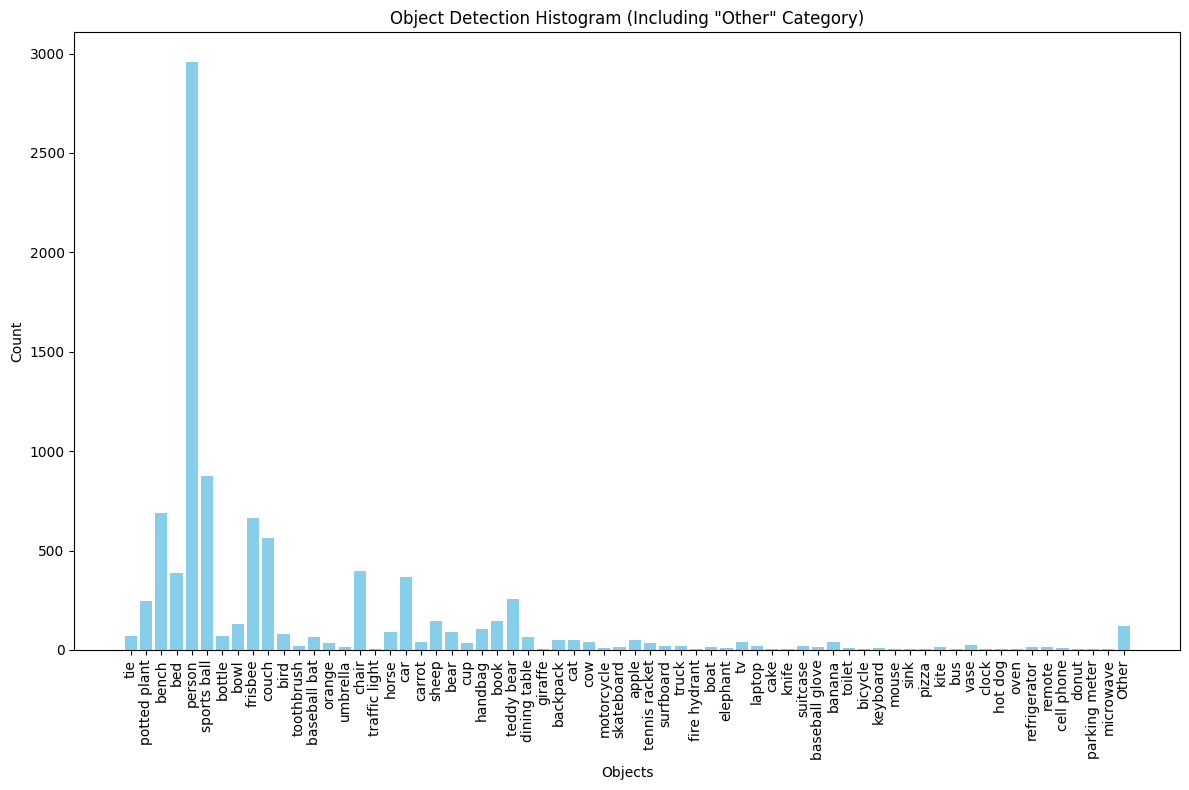

In [ ]:
import matplotlib.pyplot as plt

# Split the objects in each row, and flatten the list
all_objects = df[detected_obj_column].dropna().str.split(',').sum()

# Strip whitespace from each object
all_objects = [obj.strip() for obj in all_objects]

# Remove 'Dog' object from the list
all_objects = [obj for obj in all_objects if obj != 'dog']

# Count the occurrences of each object
object_counts = Counter(all_objects)

# Filter the objects with more than n occurrences
filtered_counts = {obj: count for obj, count in object_counts.items() if count > 2}

# Calculate the 'Other' category (objects with n or fewer occurrences)
other_count = sum(count for count in object_counts.values() if count <= 10)

# Add the 'Other' category to the filtered counts
filtered_counts['Other'] = other_count

objects = list(filtered_counts.keys())
counts = list(filtered_counts.values())

plt.figure(figsize=(12, 8))
plt.bar(objects, counts, color='skyblue')
plt.xlabel('Objects')
plt.ylabel('Count')
plt.title('Object Detection Histogram (Including "Other" Category)')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.tight_layout()
plt.show()


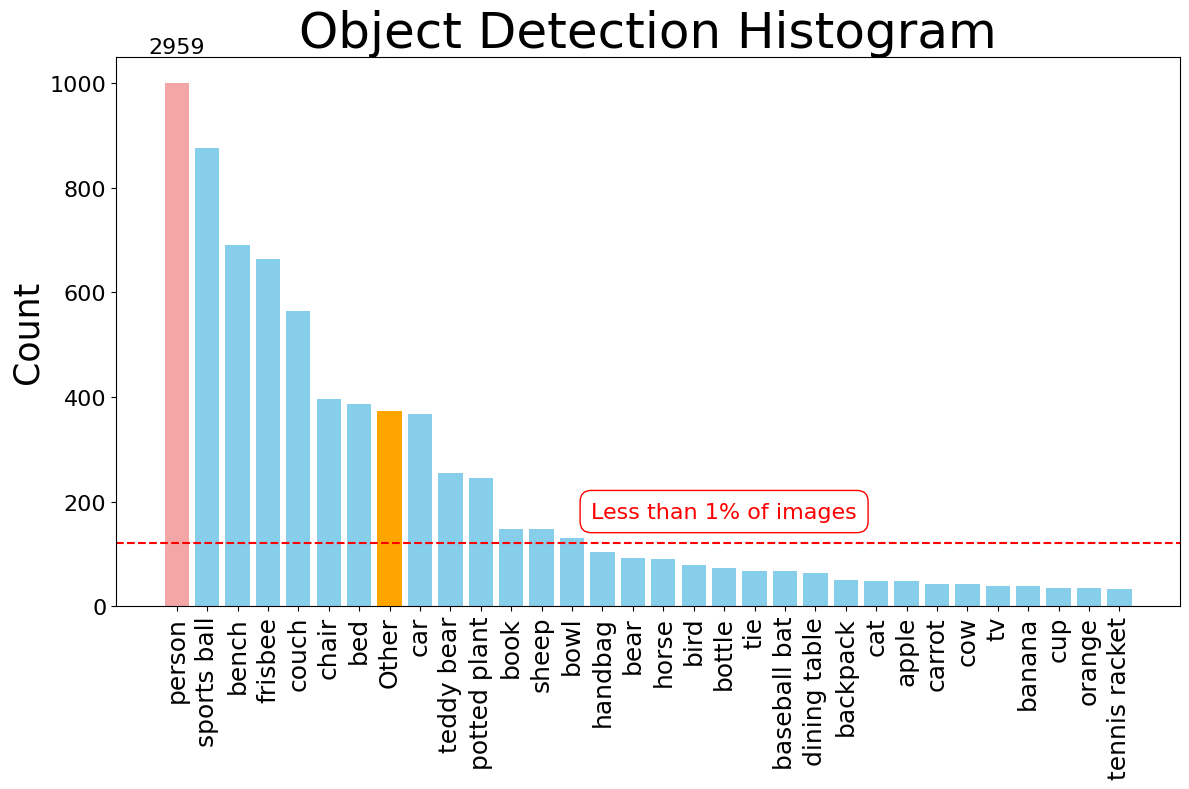

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

detected_obj_column = 'DetectedObj'

# Split the objects in each row, and flatten the list
all_objects = df[detected_obj_column].dropna().str.split(',').sum()

# Strip whitespace from each object
all_objects = [obj.strip() for obj in all_objects]

# Remove 'Dog' object from the list
all_objects = [obj for obj in all_objects if obj != 'dog']

# Count the occurrences of each object
object_counts = Counter(all_objects)

# Filter the objects with more than n occurrences
filtered_counts = {obj: count for obj, count in object_counts.items() if count > 25}

# Calculate the 'Other' category (objects with n or fewer occurrences)
other_count = sum(count for count in object_counts.values() if count <= 25)

# Add the 'Other' category to the filtered counts
filtered_counts['Other'] = other_count

# Sort the objects by count in descending order
sorted_counts = dict(sorted(filtered_counts.items(), key=lambda item: item[1], reverse=True))

# Plot the histogram
plt.figure(figsize=(12, 8))

# Apply false origin to the 'Person' bar if it exists
person_count = sorted_counts.get('person', 0)
false_origin_threshold = 1000  # Set the threshold for false origin
if person_count > false_origin_threshold:
    plt.bar('person', false_origin_threshold, color='lightcoral', alpha=0.7, label=f"Person (truncated at {false_origin_threshold})")
    plt.text('person', false_origin_threshold + 50, f'{person_count}', ha='center', va='bottom', fontsize=16)
    sorted_counts.pop('person')
else:
    plt.bar('person', person_count, color='lightcoral', alpha=0.7)

colors = ['orange' if obj == 'Other' else 'skyblue' for obj in sorted_counts.keys()]
plt.bar(sorted_counts.keys(), sorted_counts.values(), color=colors)

# Add a horizontal line at 120 counts
plt.axhline(y=120, color='red', linestyle='--', linewidth=1.5, label='Threshold at 120 counts')

plt.text(x=18, y=200, s='Less than 1% of images', color='red', fontsize=16,
         ha='center', va='top', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

plt.ylabel('Count', fontsize=25)
plt.title('Object Detection Histogram', fontsize=36)
plt.yticks(fontsize=16)
plt.xticks(rotation=90, fontsize=18)
plt.tight_layout()

plt.show()
